In [7]:
import fastf1
import matplotlib.pyplot as plt


#Definizione variabili
year=2023
race_name="Monza"
session_type="R"

#Input utente
#year = input("Inserisci l'anno: ")
#race_name = input("Inserisci il nome del GP: ")
#session_type = input("Inserisci il tipo di sessione: ")


# Ottieni la sessione (es. Gara di Monza 2023)
session = fastf1.get_session(2023, 'Monza', 'R')  # Anno, Circuito, Tipo di sessione (R = Gara)

# Carica i dati della sessione
session.load()


core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


In [11]:
# Ottengo il numero massimo di giri completati da qualsiasi vettura
laps = session.laps
total_race_laps = laps['LapNumber'].max()
print(f"Numero totale di giri della gara: {total_race_laps}")

Numero totale di giri della gara: 52.0


In [14]:
#Stimo il carburante rimanente per ogni vettura
fuel_consumption_per_lap = 3
inital_fuel = 110
remaining_fuel = inital_fuel
#Istanzio un contatore
i=0
print(f"Valori iniziali: Carburante = {remaining_fuel}, Giri rimanenti = {total_race_laps}")

while remaining_fuel > 6 and total_race_laps > 0:
    # Calcolo il carburante rimanente dopo un giro
    remaining_fuel -= fuel_consumption_per_lap
    total_race_laps -= 1
    i += 1

    # Stampo i risultati
    print(f"Giro {i}: Carburante rimanente = {remaining_fuel} litri, Giri rimanenti = {total_race_laps}")


# Risultati finali
print("\nRisultati finali:")
print(f"Carburante rimanente: {remaining_fuel} litri")
print(f"Giri completati: {i}")
print(f"Giri rimanenti: {total_race_laps-i}")


Valori iniziali: Carburante = 110, Giri rimanenti = 52
Giro 1: Carburante rimanente = 107 litri, Giri rimanenti = 51
Giro 2: Carburante rimanente = 104 litri, Giri rimanenti = 50
Giro 3: Carburante rimanente = 101 litri, Giri rimanenti = 49
Giro 4: Carburante rimanente = 98 litri, Giri rimanenti = 48
Giro 5: Carburante rimanente = 95 litri, Giri rimanenti = 47
Giro 6: Carburante rimanente = 92 litri, Giri rimanenti = 46
Giro 7: Carburante rimanente = 89 litri, Giri rimanenti = 45
Giro 8: Carburante rimanente = 86 litri, Giri rimanenti = 44
Giro 9: Carburante rimanente = 83 litri, Giri rimanenti = 43
Giro 10: Carburante rimanente = 80 litri, Giri rimanenti = 42
Giro 11: Carburante rimanente = 77 litri, Giri rimanenti = 41
Giro 12: Carburante rimanente = 74 litri, Giri rimanenti = 40
Giro 13: Carburante rimanente = 71 litri, Giri rimanenti = 39
Giro 14: Carburante rimanente = 68 litri, Giri rimanenti = 38
Giro 15: Carburante rimanente = 65 litri, Giri rimanenti = 37
Giro 16: Carburante r

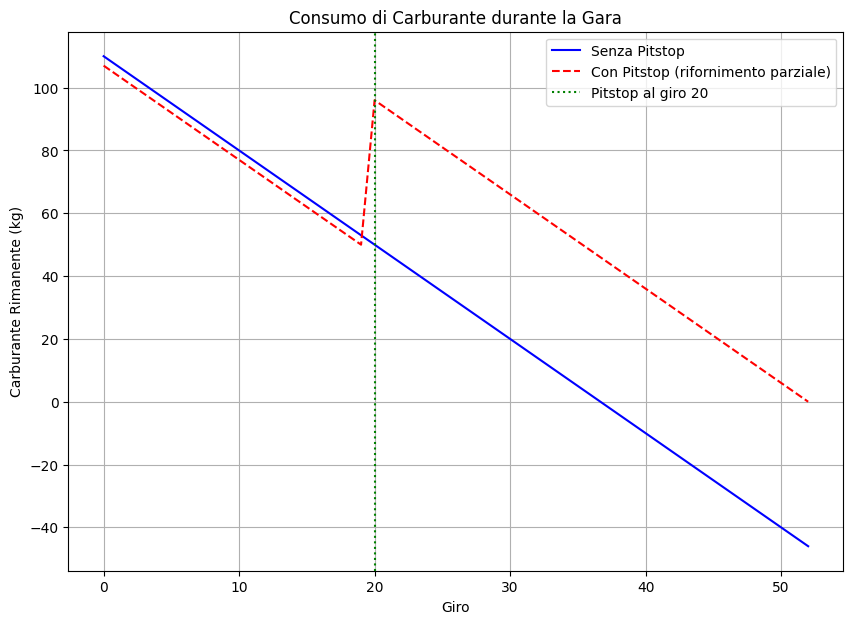

In [13]:

# Parametri iniziali
fuel_consumption_per_lap = 3  # Consumo di carburante per giro (kg)
initial_fuel = 110  # Carburante iniziale (kg)
total_race_laps = 52
remaining_fuel = initial_fuel
pitstop_lap = 20  # Giro in cui viene effettuato il pitstop

# Lista per memorizzare i dati
laps_list = []
fuel_remaining_list = []
fuel_remaining_pitstop_list = []

# Simulazione senza pitstop
for lap in range(total_race_laps + 1):
    laps_list.append(lap)
    fuel_remaining_list.append(remaining_fuel)
    remaining_fuel -= fuel_consumption_per_lap

# Simulazione con pitstop
remaining_fuel_pitstop = initial_fuel
for lap in range(total_race_laps + 1):
    if lap == pitstop_lap:
        # Calcola il carburante necessario per terminare la gara
        fuel_needed = (total_race_laps - lap) * fuel_consumption_per_lap
        # Rifornisce solo il carburante necessario
        remaining_fuel_pitstop = fuel_needed
    else:
        remaining_fuel_pitstop -= fuel_consumption_per_lap
    fuel_remaining_pitstop_list.append(remaining_fuel_pitstop)

# Creazione del grafico
plt.figure(figsize=(10, 7))

# Grafico senza pitstop
plt.plot(laps_list, fuel_remaining_list, label="Senza Pitstop", color="blue", linestyle="-")

# Grafico con pitstop
plt.plot(laps_list, fuel_remaining_pitstop_list, label="Con Pitstop (rifornimento parziale)", color="red", linestyle="--")

# Aggiunta di dettagli al grafico
plt.title("Consumo di Carburante durante la Gara")
plt.xlabel("Giro")
plt.ylabel("Carburante Rimanente (kg)")
plt.axvline(x=pitstop_lap, color="green", linestyle=":", label=f"Pitstop al giro {pitstop_lap}")
plt.legend()
plt.grid(True)
plt.show()

Consumo di carburante per giro necessario: 2.094 kg/giro


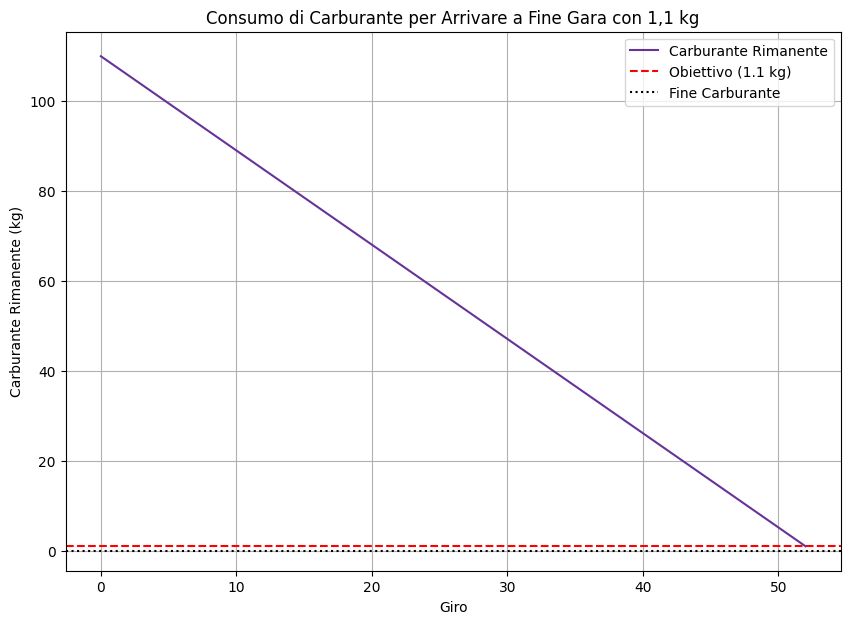

Carburante rimanente alla fine della gara: 1.100 kg


In [18]:
import matplotlib.pyplot as plt

# Parametri iniziali
initial_fuel = 110  # Carburante iniziale (kg)
total_race_laps = 52  # Numero totale di giri della gara
target_fuel = 1.1  # Carburante obiettivo alla fine della gara (kg)

# Calcolo del consumo di carburante per giro necessario
total_fuel_used = initial_fuel - target_fuel
fuel_consumption_per_lap = total_fuel_used / total_race_laps
print(f"Consumo di carburante per giro necessario: {fuel_consumption_per_lap:.3f} kg/giro")

# Simulazione del consumo di carburante
laps_list = []
fuel_remaining_list = []

remaining_fuel = initial_fuel
for lap in range(total_race_laps + 1):
    laps_list.append(lap)
    fuel_remaining_list.append(remaining_fuel)
    remaining_fuel -= fuel_consumption_per_lap

# Creazione del grafico
plt.figure(figsize=(10, 7))

# Grafico del consumo di carburante
plt.plot(laps_list, fuel_remaining_list, label="Carburante Rimanente", color="rebeccapurple", linestyle="-")

# Aggiunta di dettagli al grafico
plt.title("Consumo di Carburante per Arrivare a Fine Gara con 1,1 kg")
plt.xlabel("Giro")
plt.ylabel("Carburante Rimanente (kg)")
plt.axhline(y=target_fuel, color="red", linestyle="--", label=f"Obiettivo ({target_fuel} kg)")
plt.axhline(y=0, color="black", linestyle=":", label="Fine Carburante")
plt.legend()
plt.grid(True)
plt.show()

# Carburante rimanente alla fine della gara
final_fuel = fuel_remaining_list[-1]
print(f"Carburante rimanente alla fine della gara: {final_fuel:.3f} kg")